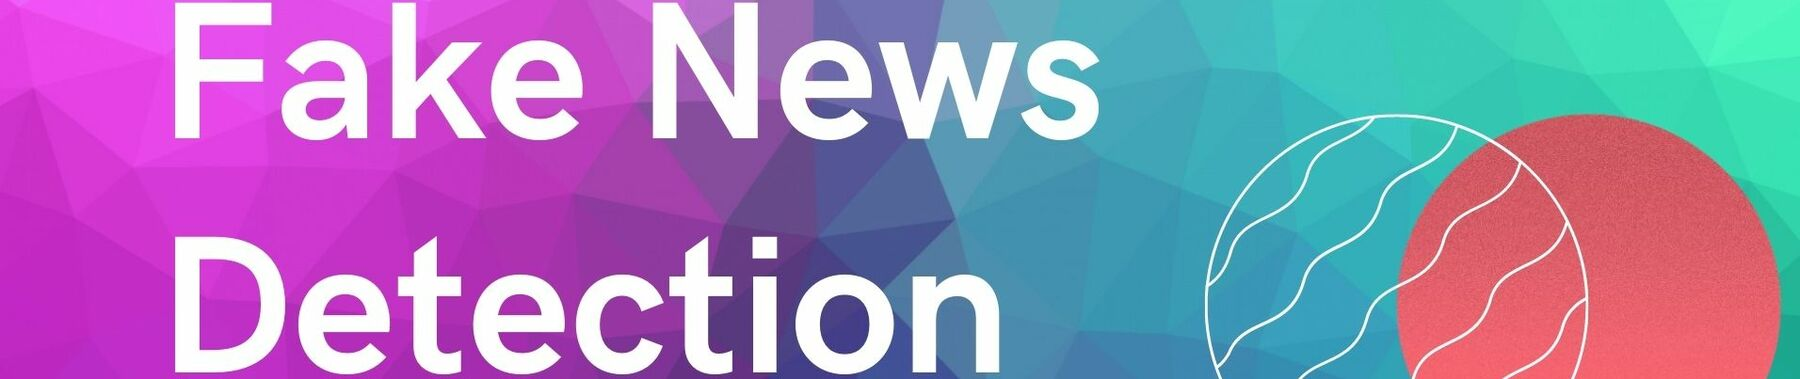

# <font color='red'>1. Business/Real World Problem</font>

   ## <font color='orange'>1.1 Description</font>
   
The rise of fake news has become a significant concern in the digital age. The dissemination of false information through various online platforms can have severe consequences, including reputational damage, public panic, and social unrest. As a result, there is a growing need for a reliable and efficient solution to detect and combat fake news.

## <font color='orange'>1.2 Source of the data </font>

https://www.kaggle.com/datasets/jainpooja/fake-news-detection

## <font color='orange'>1.3 Real World/Business Objectives</font>

1. Enhance User Trust and Engagement: By implementing an effective fake news detection system, businesses aim to build trust among their users and customers. The objective is to provide a platform or service that delivers accurate and trustworthy information, leading to increased user engagement and loyalty.


2. Protect Brand Reputation: Fake news can cause significant damage to a brand's reputation if it is associated with disseminating false or misleading information. The business objective is to safeguard the brand's reputation by actively detecting and addressing fake news, demonstrating a commitment to providing reliable content.


3. Minimize Legal and Regulatory Risks: In regions where regulations exist to combat fake news, businesses need to comply with legal requirements. Implementing a robust ML-based fake news detection system helps minimize legal risks, potential penalties, and regulatory scrutiny by actively addressing the spread of misinformation.

# <font color='red'>2. ML Problem</font>

## <font color='orange'>2.1 Data</font>

### <font color='green'>2.1.1 Data Overview</font>

- Data will be in a file fake.csv and true.csv
- Number of rows : 42834
- Number of columns/features : 4

## <font color='orange'>2.2 Mapping the Real World Problem to ML Problem </font>

### <font color='green'>2.2.1 Type of ML Problem</font>

It is a binary class classification problem and our task is to detect fake news.


### <font color='green'>2.2.2 Performance Metrics</font>

- Accuracy
- Auc-ROC Score


### <font color='green'>2.2.3 Train and Test Construction</font>

As the data is Non-Temporal in nature, we employ Random Splitting Strategy.


# <font color='red'>3. Data Aquisition</font>

In [24]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlfast import Text_preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, log_loss, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Importing the fake news data
df_fake = pd.read_csv(r'C:\Users\SVF\Desktop\CodeClause Internship\Fake News Detection/Fake.csv')
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
# Importing the true news data
df_true = pd.read_csv(r'C:\Users\SVF\Desktop\CodeClause Internship\Fake News Detection/True.csv')
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# <font color='red'>4. Exploratory Data Analysis</font>

## <font color='orange'>4.1 Inserting a feature Class as a Output Label</font>

In [4]:
df_fake['class'] = 0
df_true['class'] = 1

## <font color='orange'>4.2 Merging the DataFrames</font>

In [5]:
# Slightly Imbalanced Data
df_fake.shape[0], df_true.shape[0]

(23481, 21417)

In [6]:
# Randomly shuffle the dataframes
df_fake = df_fake.sample(frac=1)[:21417]
df_true = df_true.sample(frac=1)

In [7]:
df = pd.concat([df_fake, df_true], axis = 0 )
df.tail()

,title,text,subject,date,class
18540,France urges all sides in Cameroon to show res...,PARIS (Reuters) - France called on all sides t...,worldnews,"October 2, 2017",1
10562,Republican Romney to make 'major speech' on 20...,WASHINGTON (Reuters) - Former Republican presi...,politicsNews,"March 2, 2016",1
12953,Tunisian labor union says Jerusalem decision a...,TUNIS (Reuters) - Tunisia s powerful labor uni...,worldnews,"December 6, 2017",1
5953,U.S.-Mexico crisis deepens as Trump aide float...,PHILADELPHIA/MEXICO CITY (Reuters) - The White...,politicsNews,"January 26, 2017",1
5834,Trump state visit to Britain 'months away': UK...,LONDON (Reuters) - A planned state visit to Br...,politicsNews,"January 31, 2017",1


## <font color='orange'>4.3 Removing features which are not important</font>

In [8]:
df.reset_index(inplace = True)
df = df[['text', 'class']]

## <font color='orange'>4.4 Basic Information About the Data</font>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42834 entries, 0 to 42833
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42834 non-null  object
 1   class   42834 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 669.4+ KB


In [10]:
df.isnull().all()

text     False
class    False
dtype: bool

In [11]:
# Balanced Dataset
df['class'].value_counts()

0    21417
1    21417
Name: class, dtype: int64

## <font color='orange'>4.5 Randomly Shuffle the Data</font>

In [12]:
df = df.sample(frac=1)
df.head(5)

,text,class
14204,Tune in to the Alternate Current Radio Network...,0
1245,Here is Danney Williams tragic story. There is...,0
40090,ANKARA (Reuters) - Turkey is launching an init...,1
29659,RIYADH (Reuters) - The chief negotiator of Syr...,1
34671,"TARTU, Estonia (Reuters) - A group of NATO all...",1


# <font color='red'>5. Data Preprocessing</font>

In [13]:
# Make everything to lower case 
df['text'] = df['text'].str.lower()

In [14]:
df['text'].apply(Text_preprocessing, stem=False, lemmatize=True, remove_html=True, remove_emoji=True, remove_special_chars=True, remove_extra_spaces=True)

14204    tune alternate current radio network acr anoth...
1245     danney williams tragic story something sweet s...
40090    ankara reuters turkey launching initiative uni...
29659    riyadh reuters chief negotiator syria main opp...
34671    tartu estonia reuters group nato ally consider...
                               ...                        
8274     group white nationalist skinhead support donal...
37266    san francisco reuters party fouryearold legal ...
11979    know better think either bill clinton senile t...
30950    lahore reuters campaigning pakistan byelection...
30106    washington reuters u secretary defense james m...
Name: text, Length: 42834, dtype: object

## <font color='orange'>5.2 Train-Test Splitting</font>

In [15]:
X = df['text']
y = df['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <font color='orange'>5.3 Converting Text to Vector</font>

In [18]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# <font color='red'>6. Machine Learning Models</font>

## <font color='orange'>6.1 Logistic Regression</font>

In [21]:
param = {'C': [10 ** x for x in range(-5, 2)],
          'penalty': ['l1', 'l2']}

lr = LogisticRegression(n_jobs=-1, random_state=42)
model = GridSearchCV(lr, param, scoring='accuracy', n_jobs=-1, cv=3, return_train_score=True)
model.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy')

In [22]:
print(model.best_params_)

{'C': 10, 'penalty': 'l2'}


In [25]:
lr = LogisticRegression(C= 10, penalty='l2', random_state=42, n_jobs=-1)

lr_clf = CalibratedClassifierCV(lr, method='sigmoid', n_jobs=-1)
lr_clf.fit(X_train_tfidf, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(C=10, n_jobs=-1,
                                                         random_state=42),
                       n_jobs=-1)

In [26]:
predict_y_train = lr_clf.predict(X_train_tfidf)
predict_y_test = lr_clf.predict(X_test_tfidf)

print('Accuracy on Training data using Logistic Regression: ', accuracy_score(y_train, predict_y_train))
print('Accuracy on Test data using Logistic Regression: ', accuracy_score(y_test, predict_y_test))

Accuracy on Training data using Logistic Regression:  0.9987451483934981
Accuracy on Test data using Logistic Regression:  0.9906618419516751


In [27]:
print('AUC Score on Train data using Logistic Regression : ', roc_auc_score(y_train, predict_y_train))
print('AUC Score on Test data using Logistic Regression : ', roc_auc_score(y_test, predict_y_test))

AUC Score on Train data using Logistic Regression :  0.998746323906257
AUC Score on Test data using Logistic Regression :  0.9906671321368461


In [28]:
print(classification_report(y_test, predict_y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4320

    accuracy                           0.99      8567
   macro avg       0.99      0.99      0.99      8567
weighted avg       0.99      0.99      0.99      8567



## <font color='orange'>6.2 Random Forest</font>

In [34]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [35]:
predict_y_train = rf_clf.predict(X_train_tfidf)
predict_y_test = rf_clf.predict(X_test_tfidf)

print('Accuracy on Training data using Random Forest: ', accuracy_score(y_train, predict_y_train))
print('Accuracy on Test data using Random Forest: ', accuracy_score(y_test, predict_y_test))

Accuracy on Training data using Random Forest:  1.0
Accuracy on Test data using Random Forest:  0.9906618419516751


In [36]:
print('AUC Score on Train data using Random Forest : ', roc_auc_score(y_train, predict_y_train))
print('AUC Score on Test data using Random Forest : ', roc_auc_score(y_test, predict_y_test))

AUC Score on Train data using Random Forest :  1.0
AUC Score on Test data using Random Forest :  0.9906711109802999


In [37]:
print(classification_report(y_test, predict_y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4247
           1       0.99      0.99      0.99      4320

    accuracy                           0.99      8567
   macro avg       0.99      0.99      0.99      8567
weighted avg       0.99      0.99      0.99      8567



## <font color='orange'>6.3 XGBoost</font>

In [38]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [39]:
predict_y_train = xgb_clf.predict(X_train_tfidf)
predict_y_test = xgb_clf.predict(X_test_tfidf)

print('Accuracy on Training data using XGBoost: ', accuracy_score(y_train, predict_y_train))
print('Accuracy on Test data using XGBoost: ', accuracy_score(y_test, predict_y_test))

Accuracy on Training data using XGBoost:  1.0
Accuracy on Test data using XGBoost:  0.9983658223415431


In [40]:
print('AUC Score on Train data using XGBoost : ', roc_auc_score(y_train, predict_y_train))
print('AUC Score on Test data using XGBoost : ', roc_auc_score(y_test, predict_y_test))

AUC Score on Train data using XGBoost :  1.0
AUC Score on Test data using XGBoost :  0.9983657036775414


In [41]:
print(classification_report(y_test, predict_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4247
           1       1.00      1.00      1.00      4320

    accuracy                           1.00      8567
   macro avg       1.00      1.00      1.00      8567
weighted avg       1.00      1.00      1.00      8567

